# Import del dataset e delle variabili esogene

In [1]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


dataset:pd.DataFrame = pd.read_csv("S&P 500/sp500_index.csv")
dataset_exog:pd.DataFrame = pd.read_csv("S&P 500/sp500_stocks.csv")
companies = ["AAPL", "MSFT", "AMZN", "BRK-B", "JNJ", "JPM", "XOM",  "GOOG", "GOOGL"]
dataset_exog = dataset_exog[dataset_exog['Symbol'].isin(companies)]
dataset_exog['Date'] = pd.to_datetime(dataset_exog['Date'])
dataset_exog = dataset_exog[dataset_exog['Date'] >= datetime(year = 2012,month = 11,day = 12)]
exogenous = dataset_exog[['Date', 'Symbol', 'Close', 'High', 'Low', 'Volume']].dropna()
# Ripulire il dataset da valori nulli e simili
dataset = dataset.dropna()
#dataset = dataset.interpolate()
dataset.columns = ['data', 'sp500']
dataset['data'] = pd.to_datetime(dataset['data'])
dataset = dataset.set_index('data')
exogenous = exogenous.set_index('Date')

print("----------------------DATASET---------------")
print(dataset)
print("----------------------EXOGENOUS-----------------")
print(exogenous)

----------------------DATASET---------------
              sp500
data               
2012-11-12  1380.03
2012-11-13  1374.53
2012-11-14  1355.49
2012-11-15  1353.33
2012-11-16  1359.88
...             ...
2022-11-03  3719.89
2022-11-04  3770.55
2022-11-07  3806.80
2022-11-08  3828.11
2022-11-09  3748.57

[2517 rows x 1 columns]
----------------------EXOGENOUS-----------------
           Symbol       Close        High         Low       Volume
Date                                                              
2012-11-12  GOOGL   16.664164   16.761763   16.538288   56179764.0
2012-11-13  GOOGL   16.492743   16.706707   16.472221   63704232.0
2012-11-14  GOOGL   16.330080   16.571072   16.278778   66669264.0
2012-11-15  GOOGL   16.197699   16.516518   16.113613   73882044.0
2012-11-16  GOOGL   16.195696   16.341843   15.915916  137390472.0
...           ...         ...         ...         ...          ...
2022-11-04   MSFT  221.389999  221.589996  213.429993   36767800.0
2022-11-07   MSFT 

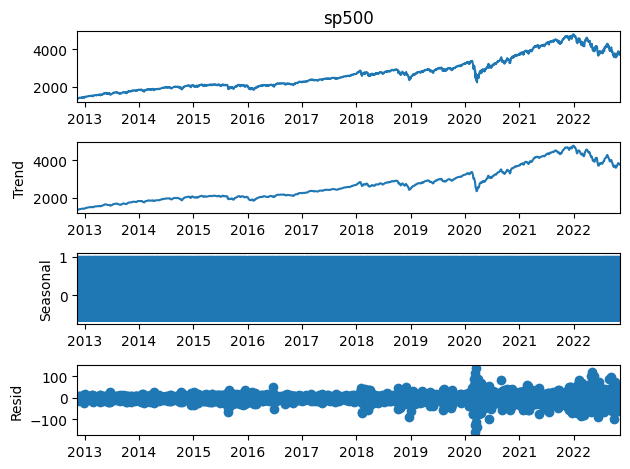

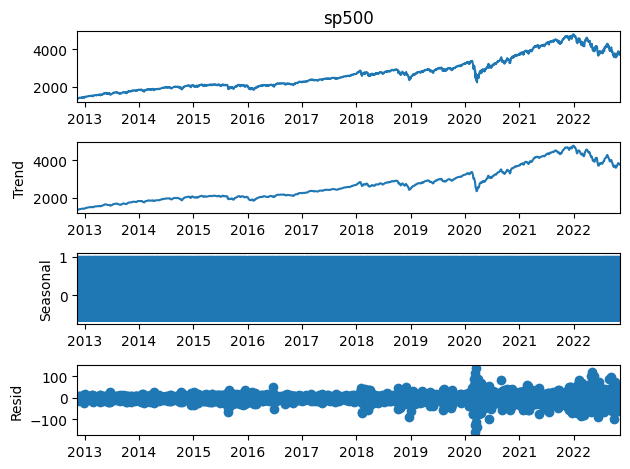

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(dataset.sp500, period=5).plot()

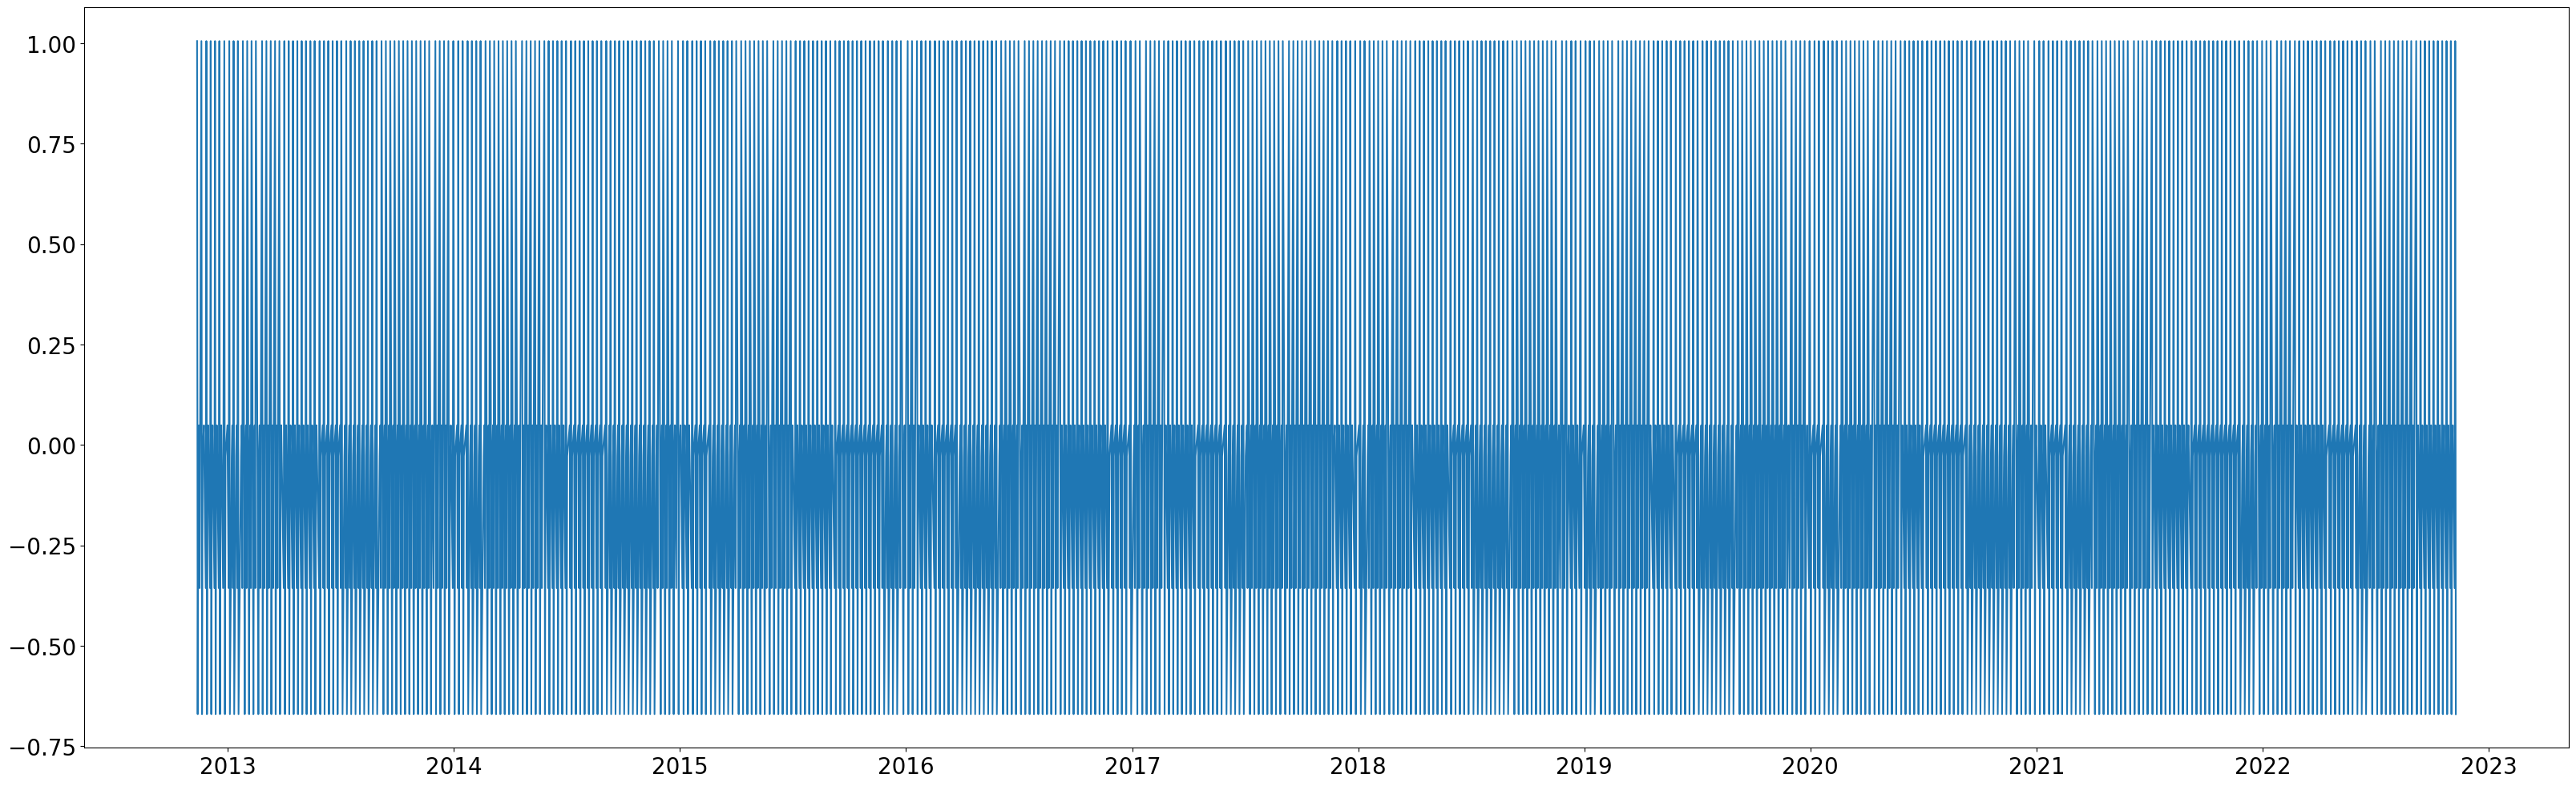

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

#seasonal_decompose(dataset.sp500, period=90).plot()
#seasonal_decompose(dataset.sp500, period=30).plot()
#seasonal_decompose(dataset.sp500, period=5).plot()
figure = plt.gcf()
figure.set_size_inches(40,12)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.plot(seasonal_decompose(dataset.sp500, period=5).seasonal)
#seasonal_decompose(dataset.sp500, period=365).plot()

# Aggiunta di ulteriori variaibli utili
Queste variabili solo forse milgiori come variabili esogenere rispetto al valore secco delle variaibli di partenza perché permettono di cogliere meglio l'andamento delle curve e non rende la previsione troppo dipendente e simile al valore reale di questa variabili

In [2]:
lag_features = []
exogenous_1=exogenous[~exogenous.index.duplicated(keep="first")]
for company in companies:
    single_company_vals = exogenous[exogenous['Symbol']==company]
    single_company_vals.drop(columns=['Symbol'], inplace=True)
    single_company_vals.rename(columns={"Close":f"Close_{company}", "High":f"High_{company}", "Low":f"Low_{company}", "Volume":f"Volume_{company}"}, inplace=True)
    exogenous_1 = pd.concat([exogenous_1, single_company_vals], axis=1)
    [lag_features.append(x) for x in list(single_company_vals.columns)]

exogenous_1.drop(columns=['Symbol', 'High', 'Low', 'Close', 'Volume'], inplace=True)
exogenous_1 = exogenous_1[:-1]
print(exogenous_1)

            Close_AAPL   High_AAPL    Low_AAPL   Volume_AAPL  Close_MSFT  \
Date                                                                       
2012-11-12   19.386786   19.803572   19.237499  5.158020e+08   28.219999   
2012-11-13   19.389286   19.660000   19.155714  5.329492e+08   27.090000   
2012-11-14   19.174286   19.551786   19.149286  4.771704e+08   26.840000   
2012-11-15   18.772142   19.267857   18.665001  7.899108e+08   26.660000   
2012-11-16   18.845715   18.928572   18.062500  1.266894e+09   26.520000   
...                ...         ...         ...           ...         ...   
2022-11-03  138.880005  142.800003  138.750000  9.791850e+07  214.250000   
2022-11-04  138.380005  142.669998  134.380005  1.407167e+08  221.389999   
2022-11-07  138.919998  139.149994  135.669998  8.337460e+07  227.869995   
2022-11-08  139.500000  141.429993  137.490005  8.990850e+07  228.869995   
2022-11-09  134.869995  138.550003  134.589996  7.491780e+07  224.509995   

           

/tmp/ipykernel_7165/11087608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_company_vals.drop(columns=['Symbol'], inplace=True)
/tmp/ipykernel_7165/11087608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_company_vals.rename(columns={"Close":f"Close_{company}", "High":f"High_{company}", "Low":f"Low_{company}", "Volume":f"Volume_{company}"}, inplace=True)
/tmp/ipykernel_7165/11087608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [3]:
df= exogenous_1.copy()

df.reset_index(drop=True, inplace=True)
window1 = 3
window2 = 7
window3 = 31
window4 = 60
#window5 = 180
#window6 = 360

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)
df_rolled_60d = df[lag_features].rolling(window=window4, min_periods=0)
#df_rolled_180d = df[lag_features].rolling(window=window5, min_periods=0)
#df_rolled_360d = df[lag_features].rolling(window=window5, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)
df_mean_60d = df_rolled_60d.mean().shift(1).reset_index().astype(np.float32)
#df_mean_180d = df_rolled_180d.mean().shift(1).reset_index().astype(np.float32)
#df_mean_360d = df_rolled_360d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)
df_std_60d = df_rolled_60d.std().shift(1).reset_index().astype(np.float32)
#df_std_180d = df_rolled_180d.std().shift(1).reset_index().astype(np.float32)
#df_std_360d = df_rolled_360d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    df[f"{feature}_mean_lag{window4}"] = df_mean_60d[feature]
#    df[f"{feature}_mean_lag{window5}"] = df_mean_180d[feature]
#    df[f"{feature}_mean_lag{window6}"] = df_mean_180d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]
    df[f"{feature}_std_lag{window4}"] = df_std_60d[feature]
#    df[f"{feature}_std_lag{window5}"] = df_std_180d[feature]
#    df[f"{feature}_std_lag{window6}"] = df_std_180d[feature]

df.fillna(df.mean(), inplace=True)
df.index = exogenous_1.index
exogenous_1 = df
df.head()

/tmp/ipykernel_7165/1802111704.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature}_mean_lag{window4}"] = df_mean_60d[feature]
/tmp/ipykernel_7165/1802111704.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
/tmp/ipykernel_7165/1802111704.py:41: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead

,Close_AAPL,High_AAPL,Low_AAPL,Volume_AAPL,Close_MSFT,High_MSFT,Low_MSFT,Volume_MSFT,Close_AMZN,High_AMZN,...,Low_GOOGL_std_lag31,Low_GOOGL_std_lag60,Volume_GOOGL_mean_lag3,Volume_GOOGL_mean_lag7,Volume_GOOGL_mean_lag31,Volume_GOOGL_mean_lag60,Volume_GOOGL_std_lag3,Volume_GOOGL_std_lag7,Volume_GOOGL_std_lag31,Volume_GOOGL_std_lag60
Date,,,,,,,,,,,,,,,,,,,,,
2012-11-12,19.386786,19.803572,19.237499,5.158020e+08,28.219999,29.010000,28.209999,61112300.0,11.3235,11.4610,...,1.905657,2.620576,43622848.0,43636420.0,43842356.0,44171164.0,10166462.0,13003051.0,17358904.0,18905918.0
2012-11-13,19.389286,19.660000,19.155714,5.329492e+08,27.090000,27.299999,26.750000,131689200.0,11.3300,11.3950,...,1.905657,2.620576,56179764.0,56179764.0,56179764.0,56179764.0,10166462.0,13003051.0,17358904.0,18905918.0
2012-11-14,19.174286,19.551786,19.149286,4.771704e+08,26.840000,27.290001,26.799999,76086100.0,11.1475,11.3705,...,0.046716,0.046716,59942000.0,59942000.0,59942000.0,59942000.0,5320602.5,5320602.5,5320602.5,5320602.5
2012-11-15,18.772142,19.267857,18.665001,7.899108e+08,26.660000,26.969999,26.629999,50955600.0,11.0300,11.2580,...,0.134864,0.134864,62184420.0,62184420.0,62184420.0,62184420.0,5407381.5,5407381.5,5407381.5,5407381.5
2012-11-16,18.845715,18.928572,18.062500,1.266894e+09,26.520000,26.700001,26.340000,64083300.0,11.2615,11.3125,...,0.192648,0.192648,68085184.0,65108824.0,65108824.0,65108824.0,5234556.0,7328150.0,7328150.0,7328150.0


# Definizione del modello

In [4]:
from datetime import date, timedelta

start = date(year=2022, month=11, day=9)
end = date(year=2022, month=12, day=21)

# get list of all days
all_days = [start + timedelta(x) for x in range((end - start).days)]
business_days = list(filter(lambda x: x.weekday()<5, all_days))
print(len(business_days))

30


In [19]:
d=1
p=2
q=2
exog_list_30d = [s for s in exogenous_1.columns.to_list() if 'lag31' in s]
[exog_list_30d.append(s) for s in exogenous_1.columns.to_list() if 'lag60' in s]
print(exog_list_30d)

['Close_AAPL_mean_lag31', 'Close_AAPL_std_lag31', 'High_AAPL_mean_lag31', 'High_AAPL_std_lag31', 'Low_AAPL_mean_lag31', 'Low_AAPL_std_lag31', 'Volume_AAPL_mean_lag31', 'Volume_AAPL_std_lag31', 'Close_MSFT_mean_lag31', 'Close_MSFT_std_lag31', 'High_MSFT_mean_lag31', 'High_MSFT_std_lag31', 'Low_MSFT_mean_lag31', 'Low_MSFT_std_lag31', 'Volume_MSFT_mean_lag31', 'Volume_MSFT_std_lag31', 'Close_AMZN_mean_lag31', 'Close_AMZN_std_lag31', 'High_AMZN_mean_lag31', 'High_AMZN_std_lag31', 'Low_AMZN_mean_lag31', 'Low_AMZN_std_lag31', 'Volume_AMZN_mean_lag31', 'Volume_AMZN_std_lag31', 'Close_BRK-B_mean_lag31', 'Close_BRK-B_std_lag31', 'High_BRK-B_mean_lag31', 'High_BRK-B_std_lag31', 'Low_BRK-B_mean_lag31', 'Low_BRK-B_std_lag31', 'Volume_BRK-B_mean_lag31', 'Volume_BRK-B_std_lag31', 'Close_JNJ_mean_lag31', 'Close_JNJ_std_lag31', 'High_JNJ_mean_lag31', 'High_JNJ_std_lag31', 'Low_JNJ_mean_lag31', 'Low_JNJ_std_lag31', 'Volume_JNJ_mean_lag31', 'Volume_JNJ_std_lag31', 'Close_JPM_mean_lag31', 'Close_JPM_std_

In [7]:
dataset_SARIMAX = dataset.copy()
dataset_SARIMAX.index = pd.DatetimeIndex(dataset_SARIMAX.index).to_period('D')
exogenous_1.index = pd.DatetimeIndex(exogenous_1.index).to_period('D')

/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82291D+00    |proj g|=  3.94380D+05


 This problem is unconstrained.
/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  151      1     21      1     0     0   3.944D+05   4.823D+00
  F =   4.8229124588270977     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sp500              mean     mean_se  mean_ci_lower  mean_ci_upper
2019-09-04  3823.786711   30.107203    3764.777677    3882.795745
2019-09-05  3798.099677   42.578015    3714.648301    3881.551053
2019-09-06  3812.074062   52.147206    3709.867417    3914.280707
2019-09-07  3820.174880   60.214407    3702.156812    3938.192948
2019-09-08  3822.733934   67.321753    3690.785723    3954.682146
2019-09-09  3824.556493   7

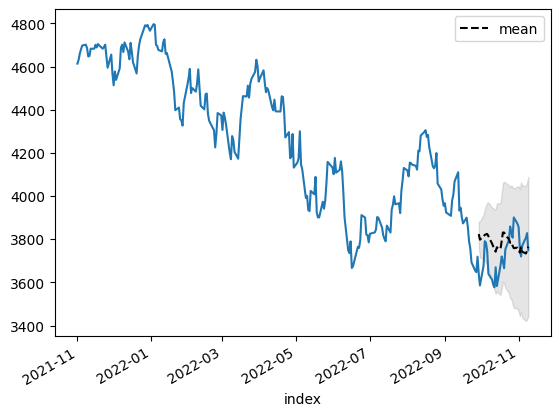

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(dataset_SARIMAX[:-30], order=(p,d,q), exog=exogenous_1[:-30][exog_list_30d], trend='ct')
model_fit = model_sarimax.fit()
fcasting = model_fit.get_forecast(30, exog=exogenous_1[-60:-30][exog_list_30d]).summary_frame()
print(fcasting)
fig, ax = plt.subplots()
dataset[dataset.index >= datetime(year=2021, month=11, day=1)].sp500.plot(ax=ax)
mean = fcasting["mean"].reset_index(drop=True)
mean = pd.DataFrame({"mean":mean, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean_lower = fcasting["mean_ci_lower"].reset_index(drop=True)
mean_lower = pd.DataFrame({"mean_ci_lower":mean_lower, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean_upper = fcasting["mean_ci_upper"].reset_index(drop=True)
mean_upper = pd.DataFrame({"mean_ci_upper":mean_upper, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean.plot(ax=ax, style='k--')
ax.fill_between(mean.index, mean_lower['mean_ci_lower'], mean_upper['mean_ci_upper'], color='k', alpha=0.1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          150     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83105D+00    |proj g|=  4.11740D+05


 This problem is unconstrained.
/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  150      1     21      1     0     0   4.117D+05   4.831D+00
  F =   4.8310549024428511     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sp500         mean     mean_se  mean_ci_lower  mean_ci_upper
2457   3716.552270   30.438478    3656.893950    3776.210590
2458   3728.488756   40.497421    3649.115270    3807.862243
2459   3745.199754   49.493557    3648.194164    3842.205344
2460   3758.230794   56.832255    3646.841621    3869.619967
2461   3765.380512   63.394596    3641.129388    3889.631637
2462   3772.763828   69.319920    3636.899282    3908.628

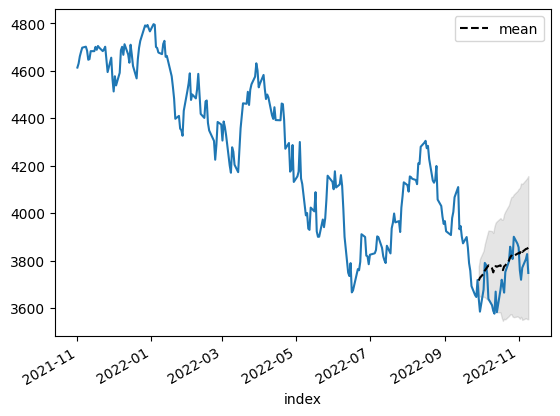

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
dataset_SARIMAX_2 = dataset_SARIMAX[30:-30].copy().reset_index(drop=True)
exogenous_2 = exogenous_1.copy().reset_index(drop=True)
model_sarimax = SARIMAX(dataset_SARIMAX_2, order=(p,d,q), exog=exogenous_2[:-60][exog_list_30d], trend='ct')
model_fit = model_sarimax.fit()
fcasting = model_fit.get_forecast(30, exog=exogenous_2[-60:-30][exog_list_30d]).summary_frame()
print(fcasting)
fig, ax = plt.subplots()
dataset[dataset.index >= datetime(year=2021, month=11, day=1)].sp500.plot(ax=ax)
mean = fcasting["mean"].reset_index(drop=True)
mean = pd.DataFrame({"mean":mean, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean_lower = fcasting["mean_ci_lower"].reset_index(drop=True)
mean_lower = pd.DataFrame({"mean_ci_lower":mean_lower, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean_upper = fcasting["mean_ci_upper"].reset_index(drop=True)
mean_upper = pd.DataFrame({"mean_ci_upper":mean_upper, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean.plot(ax=ax, style='k--')
ax.fill_between(mean.index, mean_lower['mean_ci_lower'], mean_upper['mean_ci_upper'], color='k', alpha=0.1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          331     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76669D+00    |proj g|=  3.92844D+07


 This problem is unconstrained.
/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  331      1     21      1     0     0   3.928D+07   4.767D+00
  F =   4.7666868905234807     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sp500         mean     mean_se  mean_ci_lower  mean_ci_upper
2457   3722.079647   28.504068    3666.212701    3777.946593
2458   3736.704474   37.960761    3662.302749    3811.106199
2459   3782.063744   46.566564    3690.794956    3873.332531
2460   3825.238663   53.459284    3720.460391    3930.016934
2461   3816.454576   59.757909    3699.331227    3933.577924
2462   3809.600922   65.396087    3681.426947    3937.774

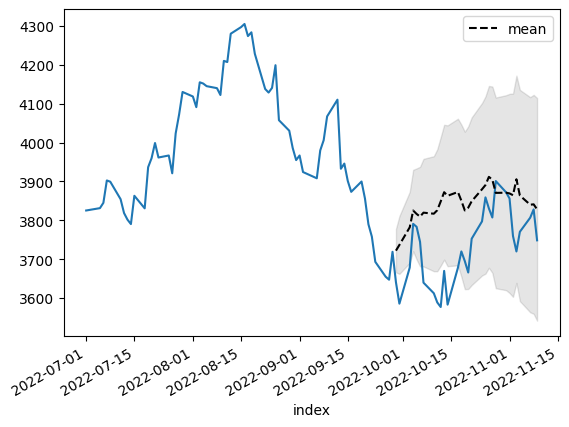

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
dataset_SARIMAX_2 = dataset_SARIMAX[30:-30].copy().reset_index(drop=True)
exogenous_2 = exogenous_1.copy().reset_index(drop=True)
model_sarimax = SARIMAX(dataset_SARIMAX_2, order=(p,d,q), exog=exogenous_2[:-60], trend='ct')
model_fit = model_sarimax.fit()
fcasting = model_fit.get_forecast(30, exog=exogenous_2[-60:-30]).summary_frame()
print(fcasting)
fig, ax = plt.subplots()
dataset[dataset.index >= datetime(year=2022, month=7, day=1)].sp500.plot(ax=ax)
mean = fcasting["mean"].reset_index(drop=True)
mean = pd.DataFrame({"mean":mean, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean_lower = fcasting["mean_ci_lower"].reset_index(drop=True)
mean_lower = pd.DataFrame({"mean_ci_lower":mean_lower, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean_upper = fcasting["mean_ci_upper"].reset_index(drop=True)
mean_upper = pd.DataFrame({"mean_ci_upper":mean_upper, "index": dataset_SARIMAX.index[-30:]}).set_index('index')
mean.plot(ax=ax, style='k--')
ax.fill_between(mean.index, mean_lower['mean_ci_lower'], mean_upper['mean_ci_upper'], color='k', alpha=0.1)

# Previsioni out-of-sample

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          151     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84930D+00    |proj g|=  3.94805D+05


 This problem is unconstrained.
/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  151      1     21      1     0     0   3.948D+05   4.849D+00
  F =   4.8492984673540578     

ABNORMAL_TERMINATION_IN_LNSRCH                              
sp500         mean     mean_se  mean_ci_lower  mean_ci_upper
2487   3759.748224   30.969347    3699.049420    3820.447028
2488   3756.031301   41.217850    3675.245800    3836.816802
2489   3766.809235   50.100258    3668.614534    3865.003937
2490   3779.641448   57.102637    3667.722336    3891.560559
2491   3788.237245   63.501154    3663.777270    3912.697220
2492   3801.160882   69.187546    3665.555784    3936.765

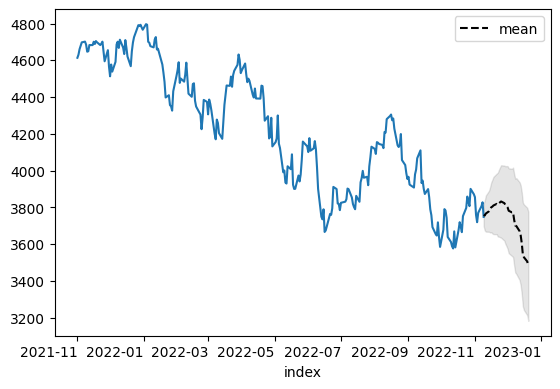

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
dataset_SARIMAX_2 = dataset_SARIMAX[30:].copy().reset_index(drop=True)
exogenous_2 = exogenous_1.copy().reset_index(drop=True)
model_sarimax = SARIMAX(dataset_SARIMAX_2, order=(p,d,q), exog=exogenous_2[:-30][exog_list_30d], trend='ct')
model_fit = model_sarimax.fit()
fcasting = model_fit.get_forecast(30, exog=exogenous_2[-30:][exog_list_30d]).summary_frame()
print(fcasting)
fig, ax = plt.subplots()
dataset[dataset.index >= datetime(year=2021, month=11, day=1)].sp500.plot(ax=ax)
mean = fcasting["mean"]
mean = pd.DataFrame({"mean":mean, "index": business_days}).set_index('index')
mean_lower = fcasting["mean_ci_lower"]
mean_lower = pd.DataFrame({"mean_ci_lower":mean_lower, "index": business_days}).set_index('index')
mean_upper = fcasting["mean_ci_upper"]
mean_upper = pd.DataFrame({"mean_ci_upper":mean_upper, "index": business_days}).set_index('index')
mean.plot(ax=ax, style='k--')
ax.fill_between(mean.index, mean_lower['mean_ci_lower'], mean_upper['mean_ci_upper'], color='k', alpha=0.1)

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
dataset_ARIMA = dataset.copy()
dataset_ARIMA.index = pd.DatetimeIndex(dataset_ARIMA.index).to_period('D') 
model = ARIMA(dataset_ARIMA, order=(p,d,q))
model_fit=model.fit()
fig, ax = plt.subplots()
plot_predict(model_fit, start=datetime(year=2022, month=9, day=28), ax=ax)
dataset[dataset.index >= datetime(year=2022, month=7, day=1)].sp500.plot(ax=ax)
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          331     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53504D+00    |proj g|=  4.50975D+08


 This problem is unconstrained.
/home/lorenzo/python_venv/data_science/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  331      1     21      1     0     0   4.510D+08   3.535D+00
  F =   3.5350446464708734     

ABNORMAL_TERMINATION_IN_LNSRCH                              


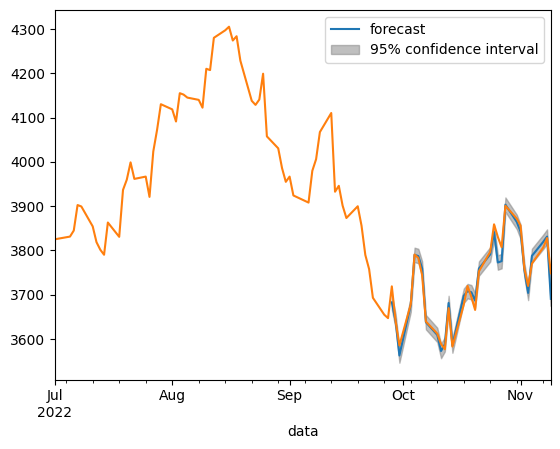

In [54]:
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(dataset_SARIMAX, order=(p,d,q), exog=exogenous_1, trend='ct')
model_fit = model_sarimax.fit()
fig, ax = plt.subplots()
plot_predict(model_fit, start=datetime(year=2022, month=9, day=28), ax=ax)
dataset[dataset.index >= datetime(year=2022, month=7, day=1)].sp500.plot(ax=ax)
plt.show()

In [21]:
# METRICHE
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
test = dataset_SARIMAX[-30:]
forecast = mean
#mean absolute error
mae = mean_absolute_error(test, forecast)

#root mean square error
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

#mean absolute percentage error
mape = np.mean(np.abs((np.array(test) - np.array(forecast))/np.array(test)))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



MAE: 77.23
RMSE: 94.60
MAPE: 0.02%
